## Topic Modeling using Latent Dirichlet Allocation (LDA)

### Importing necessary python libraries and packages

In [1]:
%matplotlib inline
import pickle
from pprint import pprint
import random
import warnings
import time

# numpy, pandas, matplotlib and regular expressions (data science essentials)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# tqdm
from tqdm import tqdm

# pip install spacy
# pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
import spacy
from spacy.lang.en import English
import en_core_web_sm


In [2]:
# gensim
import gensim
from gensim import corpora
from gensim.models import CoherenceModel


In [ ]:
#pip install gensim

In [3]:
# nltk
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import words
from nltk.stem.wordnet import WordNetLemmatizer


In [4]:
# pyLDAvis
import pyLDAvis
import pyLDAvis.gensim



In [ ]:
#pip install pyLDAvis

In [5]:
# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

In [ ]:
#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [6]:
warnings.simplefilter('ignore')

nltk.download('wordnet')
nltk.download('stopwords')

#nlp = spacy.load('en')
# nlp = en_core_web_sm.load()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [8]:
# Initialization and Global Variables
dictionary = dict.fromkeys(words.words(), None)
lemmatizer = WordNetLemmatizer()

# List for filtering out stop words
en_stop = set(nltk.corpus.stopwords.words('english'))

In [9]:
data = pd.read_csv('CustomerProductReview.csv')
data.head(3)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 14 columns):
brand                 7299 non-null object
categories            7299 non-null object
dateAdded             7299 non-null object
dateUpdated           7299 non-null object
reviews.rating        7299 non-null float64
reviews.sourceURLs    7299 non-null object
reviews.text          7299 non-null object
reviews.title         7299 non-null object
reviews.username      7299 non-null object
merchant              7299 non-null object
no_punc               7299 non-null object
tokenized_Data        7299 non-null object
no_stop               7299 non-null object
lemmatized            7299 non-null object
dtypes: float64(1), object(13)
memory usage: 798.4+ KB


In [70]:
data.describe()

,reviews.rating
count,7299.000000
mean,4.273736
std,1.214187
min,0.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
df=data[['brand','categories','dateAdded','dateUpdated','reviews.rating','reviews.sourceURLs','reviews.text','reviews.title','reviews.username']]
df.head(3)


,brand,categories,dateAdded,dateUpdated,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman


In [11]:
for column in df[['reviews.sourceURLs']]:
    columnSeriesObj = df[column]
    print('Colunm Name : ', column)
    #print('Column Contents : ', columnSeriesObj.values)
    colSeriesValue=columnSeriesObj.values
    #print('colSeriesValue: ',colSeriesValue)
    merchant=''
    merchant_array = np.empty(0) 
    for colvalue in colSeriesValue:
       substring_list=["bestbuy","amazon","walmart"]
       #merchant=next(substring for substring in substring_list if substring in colValue)
       for substring in substring_list: 
                if substring in colvalue:
                   merchant=substring
       
       merchant_array = np.append(merchant_array, [merchant], axis=0)
   

    data = df.assign(merchant = merchant_array)

Colunm Name :  reviews.sourceURLs


In [12]:
data.head(5)

,brand,categories,dateAdded,dateUpdated,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,merchant
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,bestbuy
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,bestbuy
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,bestbuy
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,bestbuy
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,bestbuy


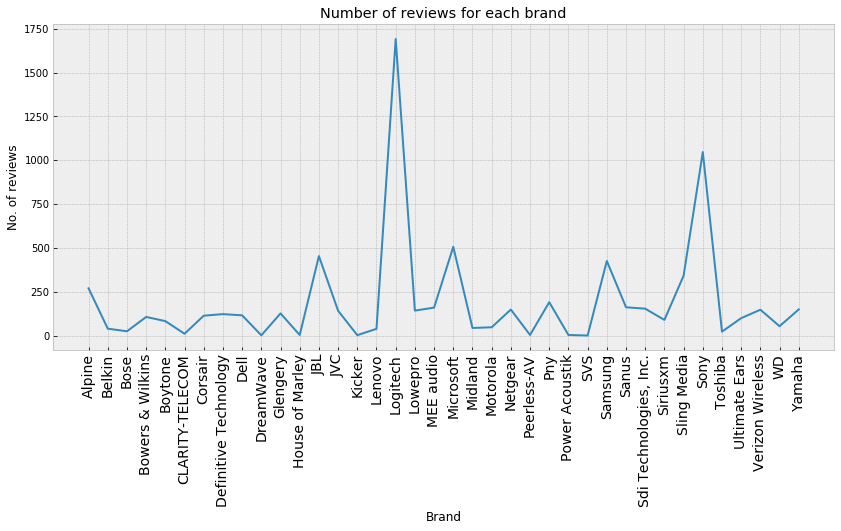

In [13]:
plt.figure(figsize=(14,6))
plt.plot(list(data.groupby(['brand']).groups.keys()),data.groupby(['brand'])['reviews.username'].count())
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Number of reviews for each brand")
plt.ylabel("No. of reviews")
plt.xlabel("Brand")
plt.show()

In [14]:
# Review feature
# We will see how many different Customers are there.
print(len(data['reviews.username'].value_counts()))

6493


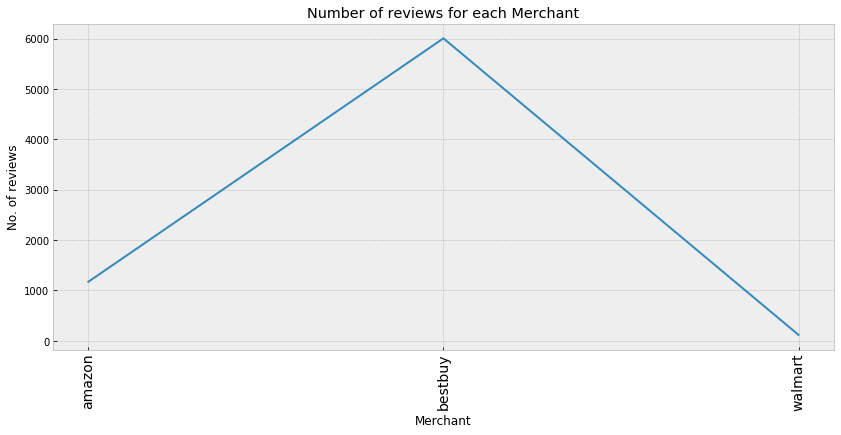

In [15]:
plt.figure(figsize=(14,6))
plt.plot(list(data.groupby(['merchant']).groups.keys()),data.groupby(['merchant'])['reviews.username'].count())
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Number of reviews for each Merchant")
plt.ylabel("No. of reviews")
plt.xlabel("Merchant")
plt.show()

In [16]:
pd.DataFrame({'Customers':len(data['reviews.username'].value_counts()),
              'brands':len(data['brand'].value_counts()),
              'reviews':len(data['reviews.text'].value_counts())},
             index = ['Quantity'])

,Customers,brands,reviews
Quantity,6493,38,7205


#### There are 7k reviews but only 6k customers with 38 brands. Looks like there are multiple reviews provided by some customers.

In [80]:
df = data.groupby(['reviews.username', 'brand'], as_index=False)['dateAdded'].count()
df = df.rename(columns = {'dateAdded':'Number of reviews'})
df = df.sort_values(['Number of reviews'],ascending=[False])
df.head(5)

,reviews.username,brand,Number of reviews
729,ByAmazon Customer,Logitech,41
732,ByAmazon Customer,Sony,15
3665,Mike,Logitech,9
6248,m m smits,Yamaha,8
3101,K. Labarre,Yamaha,7


#### There are customers who has provided reviews for only 1 brand/product and others who has reviewed many products for each brand. We can check further to find reviews for different product categories in each brand

### Analyzing customer reviews :

In [18]:
is_noun = lambda pos:pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'reviews.text'):
    import nltk
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots = dict()
    keywords_select = dict()
    category_keys = []
    count_keywords = dict()
    icount = 0
    
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
        
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)
            
            category_keys.append(clef)
            keywords_select[s] = clef
        
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
            
    print("Number of keywords in the variable '{}': {}".format(colonne, len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [19]:
df_reviews = pd.DataFrame(data['reviews.text'].unique()).rename(columns = {0:"reviews.text"})

In [20]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_reviews)

Number of keywords in the variable 'reviews.text': 6568


In [21]:
# Plotting keywords vs frequency graph :
list_products = []
for k, v in count_keywords.items():
    word = keywords_select[k]
    list_products.append([word, v])

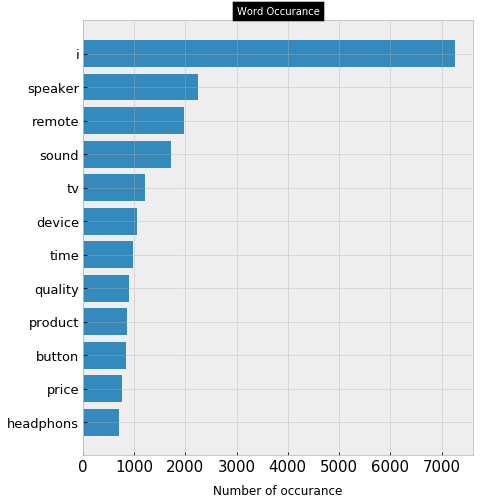

In [77]:
liste = sorted(list_products, key = lambda x:x[1], reverse=True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 8))
y_axis = [i[1] for i in liste[:12]]
x_axis = [k for k,i in enumerate(liste[:12])]
x_label = [i[0] for i in liste[:12]]
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.yticks(x_axis, x_label)
plt.xlabel("Number of occurance", fontsize = 12, labelpad = 10)
ax.barh(x_axis, y_axis, align='center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Word Occurance", bbox={'facecolor':'k', 'pad':5}, color='w', fontsize = 10)
plt.show()

In [23]:
# Checking for null values.
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = info.append(pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'}))
info

,brand,categories,dateAdded,dateUpdated,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,merchant
Null values,0.0,0.0,0.0,0.0,164.000000,0.0,5.000000,4.000000,0.0,0.0
% Null values,0.0,0.0,0.0,0.0,2.246883,0.0,0.068503,0.054802,0.0,0.0


In [24]:
data['reviews.rating'] = data['reviews.rating'].fillna(0)
data['reviews.title'] = data['reviews.title'].fillna('')
data['reviews.text'] = data['reviews.text'].fillna('')

In [25]:
data.isna().sum()

brand                 0
categories            0
dateAdded             0
dateUpdated           0
reviews.rating        0
reviews.sourceURLs    0
reviews.text          0
reviews.title         0
reviews.username      0
merchant              0
dtype: int64

In [26]:
# Checking for null values.
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = info.append(pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'}))
info

,brand,categories,dateAdded,dateUpdated,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,merchant
Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Checking for Duplicates :
data.duplicated().sum()

0

In [28]:
#user reviews for each brand
brandcount = data.groupby(['brand'])['reviews.username'].count()
brandcount

brand
Alpine                     270
Belkin                      40
Bose                        25
Bowers & Wilkins           107
Boytone                     83
CLARITY-TELECOM             11
Corsair                    114
Definitive Technology      123
Dell                       116
DreamWave                    2
Glengery                   127
House of Marley              4
JBL                        454
JVC                        142
Kicker                       3
Lenovo                      39
Logitech                  1692
Lowepro                    143
MEE audio                  160
Microsoft                  507
Midland                     44
Motorola                    48
Netgear                    149
Peerless-AV                  4
Pny                        191
Power Acoustik               4
SVS                          1
Samsung                    426
Sanus                      162
Sdi Technologies, Inc.     154
Siriusxm                    90
Sling Media                342
So

#### Describing the statistical features (viz. mean, median, standard deviation) of these features

In [29]:
data.describe()

,reviews.rating
count,7299.000000
mean,4.273736
std,1.214187
min,0.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### For nominal (categorical) variable, let us look at the number of unique values in each of them.

In [30]:
data.apply(lambda x: len(x.unique()))

brand                   38
categories              49
dateAdded               50
dateUpdated             47
reviews.rating           6
reviews.sourceURLs    2302
reviews.text          7206
reviews.title         5536
reviews.username      6493
merchant                 3
dtype: int64

In [31]:
#Print frequency of Type
print(data['merchant'].value_counts())

bestbuy    6007
amazon     1173
walmart     119
Name: merchant, dtype: int64


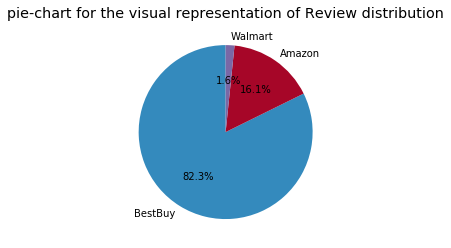

In [32]:
#pie-chart for the visual representation of store types

Type_counts = [6007, 1173, 119]
Type_labels = 'BestBuy','Amazon','Walmart'
plt.pie(Type_counts, labels=Type_labels, startangle=90, autopct='%.1f%%')
plt.title('pie-chart for the visual representation of Review distribution')
plt.show()

In [33]:
import string
from wordcloud import WordCloud,STOPWORDS

### CLEANING

In [34]:
#Removing punctuations from entire dataset
punc_set = string.punctuation
punc_set

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
#Function for removing punctions
def remove_punc(text):
    clean = "".join([x.lower() for x in text if x not in punc_set])
    return clean

#Applying the 'remove_punc' function to entire dataset
data['no_punc'] = data['reviews.title'].apply(lambda z:remove_punc(z))

In [36]:
#Function for Tokenizing entire data for representing every word as datapoint
def tokenize(text):
    tokens = re.split("\W+",text)
    return tokens

#Applying the 'tokenize' function to entire dataset
data['tokenized_Data'] = data['no_punc'].apply(lambda z:tokenize(z))

In [37]:
#Importing stopwords from NLTK Library to remove stopwords now that we have tokenized it
stopwords = nltk.corpus.stopwords.words('english')

#Function for removing stopwords from single row
def remove_stopwords(tokenized_words):
    Ligit_text=[word for word in tokenized_words if word not in stopwords]
    return Ligit_text

#Applying the function 'remove_stopwords' from the entire dataset
data["no_stop"] = data["tokenized_Data"].apply(lambda z:remove_stopwords(z))

In [38]:
#Importing 'WordNetLemmatizer' as lemmatizing function to find lemma's of words
wnl = nltk.wordnet.WordNetLemmatizer()

#Function for lemmatizing the tokenzied text
def lemmatizing(tokenized_text):
    lemma = [wnl.lemmatize(word) for word in tokenized_text]
    return lemma

#Applying the 'lemmatizing' function to entire dataset     
data['lemmatized'] = data['no_stop'].apply(lambda z:lemmatizing(z))


data.head()

,brand,categories,dateAdded,dateUpdated,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,merchant,no_punc,tokenized_Data,no_stop,lemmatized
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,bestbuy,love the fingerprint reader,"[love, the, fingerprint, reader]","[love, fingerprint, reader]","[love, fingerprint, reader]"
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,bestbuy,nice,[nice],[nice],[nice]
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,bestbuy,new,[new],[new],[new]
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,bestbuy,nice keyboard,"[nice, keyboard]","[nice, keyboard]","[nice, keyboard]"
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,bestbuy,nice improvement,"[nice, improvement]","[nice, improvement]","[nice, improvement]"


### Generating WordCloud for Review title

In [39]:
text = ", ".join(review for review in data['reviews.title'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 182720 words in the combination of all review.


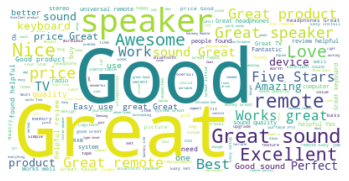

In [40]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Feature Extraction

In [41]:
print("Document-Term Matrix is being created...")
data.head()

Document-Term Matrix is being created...


,brand,categories,dateAdded,dateUpdated,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,merchant,no_punc,tokenized_Data,no_stop,lemmatized
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,bestbuy,love the fingerprint reader,"[love, the, fingerprint, reader]","[love, fingerprint, reader]","[love, fingerprint, reader]"
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,bestbuy,nice,[nice],[nice],[nice]
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,bestbuy,new,[new],[new],[new]
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,bestbuy,nice keyboard,"[nice, keyboard]","[nice, keyboard]","[nice, keyboard]"
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,bestbuy,nice improvement,"[nice, improvement]","[nice, improvement]","[nice, improvement]"


In [42]:
print("Document-Term Matrix is being created...")
for column in data[['lemmatized']]:
    columnSeriesObj = data[column]
    colSeriesValue=columnSeriesObj.values
    text_data = []

    for colvalue in colSeriesValue:
        text_data.append(colvalue)   

Document-Term Matrix is being created...


In [43]:
text_data

[['love', 'fingerprint', 'reader'],
 ['nice'],
 ['new'],
 ['nice', 'keyboard'],
 ['nice', 'improvement'],
 ['big', 'improvement'],
 ['perfect', 'type', 'cover'],
 ['good', 'keyboard'],
 ['nice', 'improvement'],
 ['fingerprint', 'scanner', 'worth', 'money'],
 ['must'],
 ['worth', 'price'],
 ['great', 'keyboard', 'great', 'cover'],
 ['keyboard', 'smooth'],
 ['pricey'],
 ['must'],
 ['great', 'keyboard'],
 ['best', 'type', 'cover', 'keyboard', 'market'],
 ['solid', 'keyboard'],
 ['start', 'perfect', 'keyboard', 'experience'],
 ['perfect'],
 ['amazing', 'amazing'],
 ['awesome', 'fingerprint', 'keyboard'],
 ['love', 'keyboard'],
 ['great', 'feel'],
 ['work', 'great'],
 ['great', 'keyboard'],
 ['keyboard'],
 ['feel', 'like', 'fullsize', 'keyboard'],
 ['best', 'surface', 'keyboard'],
 ['best', 'typing', 'cover', 'surface', 'device'],
 ['goodhttpwwwbestbuycomsiteolspagejspidpca'],
 ['much', 'improved', 'previous', 'model'],
 ['nice', 'type', 'cover'],
 ['major', 'improvement', 'previous', 'type

In [44]:
print("Generating corpus and dictionary...")

dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
#corpus = [dictionary.doc2bow(doc.split()) for doc in text_data]
pickle.dump(corpus, open('bin/resources/corpus.pkl', 'wb'))
dictionary.save('bin/resources/dictionary.gensim')

Generating corpus and dictionary...


In [45]:
%%time
print("Training LDA model on train dataframe...")

NUM_TOPICS = 180
start_time = time.time()
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=NUM_TOPICS, 
                                           random_state=89, 
                                           update_every=1,  
                                           id2word=dictionary, 
                                           passes=42, 
                                           alpha='auto', 
                                           per_word_topics=True)

ldamodel.save('bin/resources/models/model' + str(NUM_TOPICS) + '.gensim')
train_time = time.time() - start_time
print("Training Time --- %s seconds " % (round(train_time, 2)))

Training LDA model on train dataframe...
Training Time --- 78.99 seconds 
Wall time: 1min 18s


In [46]:

print("Allocated models of each topic...")

topics_train = []
topics = ldamodel.print_topics()
for topic in topics:
    pprint(topic)
    topics_train.append(topic)
    
results_dir = "output/"
with open(results_dir + "results_train.txt", 'w') as f:
    pprint(topics_train, stream=f)

Allocated models of each topic...
(112,
 '0.000*"crank" + 0.000*"xb20" + 0.000*"winner" + 0.000*"aweskme" + '
 '0.000*"tweek" + 0.000*"plus" + 0.000*"dilemma" + 0.000*"button" + '
 '0.000*"dunk" + 0.000*"taking"')
(133,
 '0.000*"crank" + 0.000*"xb20" + 0.000*"winner" + 0.000*"aweskme" + '
 '0.000*"tweek" + 0.000*"plus" + 0.000*"dilemma" + 0.000*"button" + '
 '0.000*"dunk" + 0.000*"taking"')
(118,
 '0.000*"crank" + 0.000*"xb20" + 0.000*"winner" + 0.000*"aweskme" + '
 '0.000*"tweek" + 0.000*"plus" + 0.000*"dilemma" + 0.000*"button" + '
 '0.000*"dunk" + 0.000*"taking"')
(92,
 '0.000*"crank" + 0.000*"xb20" + 0.000*"winner" + 0.000*"aweskme" + '
 '0.000*"tweek" + 0.000*"plus" + 0.000*"dilemma" + 0.000*"button" + '
 '0.000*"dunk" + 0.000*"taking"')
(156,
 '0.000*"crank" + 0.000*"xb20" + 0.000*"winner" + 0.000*"aweskme" + '
 '0.000*"tweek" + 0.000*"plus" + 0.000*"dilemma" + 0.000*"button" + '
 '0.000*"dunk" + 0.000*"taking"')
(87,
 '0.000*"crank" + 0.000*"xb20" + 0.000*"winner" + 0.000*"awesk

In [47]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -140.7660157621314

Coherence Score:  0.7054155578980054


### Cross-Validation

#### Optimal value for number of topics

#### Run the LDA model for different values of number_of_topics and recorded the corresponding coherence scores. The below table shows the result:

| Number of Topics | Coherence Scores |
|:----------------:|:----------------:|
|        50        |       0.60       |
|        64        |       0.61       |
|        70        |       0.62       |
|        80        |       0.64       |
|        90        |       0.65       |
|        100       |       0.665      |
|        101       |       0.664      |
|        102       |       0.663      |
|        103       |       0.668      |
|        104       |       0.672      |
|        109       |       0.678      |
|        117       |       0.685      |
|        123       |       0.686      |
|        137       |       0.690      |
|        165       |       0.692      |
|        200       |       0.70       |
|        220       |       0.78       |
|        225       |       0.8383     |
|        227       |       0.8383     |
|        250       |       0.8383     |
|        275       |       0.8383     |
|        500       |       0.8383     |
|        800       |       0.8383     |
|        1000      |       0.8383     |
|        1500      |       0.8383     |

#### Let us try to plot this data and infer the optimum value of number_of_topics

#### Learning Curves

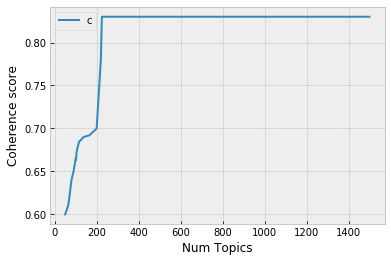

In [78]:
# Show graph
no_of_topics = [50, 64, 70, 80, 90, 100, 101, 102, 103, 104, 109, 117, 123, 137, 165,200,220, 225, 227, 250, 275, 500, 800, 1000, 1500]
coherence_scores = [0.60,0.61,0.62,0.64,0.65,0.665,0.664,0.663,0.668,0.672,0.678,0.685,0.686,0.690,0.692,0.70,0.78,0.83,0.83,0.83,0.83,0.83,0.83,0.83,0.83]
plt.plot(no_of_topics, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

The approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k); where k is a hyperparameter, and pick the one that gives the highest coherence value.

Various LDA models with different number of topics (k) were tested and their coherence scores were plotted; where k is a hyperparameter. We are supposed to choose that k which gives the highest coherence score.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics. Picking a higher stable value will lead to overfitting (more variance); whereas, picking a small value will underfit our model (more bias).

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

<b>By observing the graph above, the optimum value of number of topics is chosen to be 220 topics.</b>

If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest coherence value before flattening out. This is exactly the case here.

### Visualizing the Topic Keywords

#### Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords. The pyLDAvis package’s interactive chart is one of the best tools to visualize LDA model and view each of the topic keywords.

In [48]:
# Enabling pyLDAvis
pyLDAvis.enable_notebook()

In [49]:
# Visualizing our optimal model with 225 topics
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary,mds='tsne')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
89    -1.131014  0.924977       1        1  51.215065
90    -1.127820  0.928434       2        1  20.159636
179   -1.128907  0.928306       3        1   2.302122
14    -1.127100  0.927107       4        1   2.298298
119   -1.132747  0.922368       5        1   1.268890
36    -1.130194  0.924327       6        1   0.605934
176    0.742595  0.737563       7        1   0.127299
63     0.744587 -0.694814       8        1   0.127299
62     0.940505  0.325219       9        1   0.127299
61    -0.988647 -0.926298      10        1   0.127299
60    -1.276419 -0.593614      11        1   0.127299
59    -1.377053  0.341939      12        1   0.127299
58    -0.580279  1.171471      13        1   0.127299
57    -1.431105 -0.168870      14        1   0.127299
56     0.065983 -1.152374      15        1   0.127299
55    -1.304910 -0.541820      16        1   0.127299
65     0.409225 -1.004739      17        1   0.127299
54     0.089544 -1.148764      18        1   0.127299
53    -0.988787 -0.926183      19        1   0.127299
52     0.742582  0.737580      20        1   0.127299
51    -1.243963 -0.646121      21        1   0.127299
50     0.943653  0.307888      22        1   0.127299
49    -0.230936 -1.186287      23        1   0.127299
48     0.940787  0.324600      24        1   0.127299
47     0.742567  0.737603      25        1   0.127299
64     0.947405  0.255525      26        1   0.127299
66     0.970294 -0.055079      27        1   0.127299
45     0.075382 -1.147502      28        1   0.127299
77    -1.387867  0.370139      29        1   0.127299
85    -1.381738  0.341057      30        1   0.127299
...         ...       ...     ...      ...        ...
96    -0.234743  0.022177     151        1   0.127299
95    -0.235741  0.021545     152        1   0.127299
94    -0.235170  0.021156     153        1   0.127299
93    -0.235169  0.021156     154        1   0.127299
92    -0.235747  0.021196     155        1   0.127299
91    -0.234660  0.021944     156        1   0.127299
177   -0.234743  0.022177     157        1   0.127299
108   -0.234729  0.021271     158        1   0.127299
110   -0.234660  0.021944     159        1   0.127299
131   -0.234743  0.022177     160        1   0.127299
122   -0.234660  0.021944     161        1   0.127299
130   -0.234743  0.022177     162        1   0.127299
129   -0.234743  0.022177     163        1   0.127299
128   -0.234660  0.021944     164        1   0.127299
127   -0.234743  0.022177     165        1   0.127299
126   -0.234660  0.021944     166        1   0.127299
125   -0.234660  0.021944     167        1   0.127299
124   -0.234729  0.021271     168        1   0.127299
123   -0.234743  0.022177     169        1   0.127299
121   -0.235741  0.021545     170        1   0.127299
111   -0.234660  0.021944     171        1   0.127299
120   -0.234660  0.021944     172        1   0.127299
118   -0.235741  0.021545     173        1   0.127299
117   -0.235747  0.021196     174        1   0.127299
116   -0.235382  0.021493     175        1   0.127299
115   -0.234743  0.022177     176        1   0.127299
114   -0.235169  0.021156     177        1   0.127299
113   -0.235170  0.021156     178        1   0.127299
112   -0.234743  0.022177     179        1   0.127299
0     -0.225325  0.010348     180        1   0.127299

[180 rows x 5 columns], topic_info=      Category         Freq            Term        Total  loglift  logprob
17     Default  8622.000000           great  8622.000000  30.0000  30.0000
11     Default  2268.000000            good  2268.000000  29.0000  29.0000
28     Default  1215.000000            work  1215.000000  28.0000  28.0000
3      Default   242.000000            nice   242.000000  27.0000  27.0000
87     Default   230.000000             one   230.000000  26.0000  26.0000
325    Default  1983.000000         speaker  1983.000000  25.0000  25.0000
307   

#### Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.
A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.
After selecting one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

The size of the bubble measures the importance of the topics, relative to the data.

Saliency: a measure of how much the term tells you about the topic.
Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic. 
[Source: Wikipedia]

In [50]:
pyLDAvis.save_html(vis, 'bin/resources/vis' + str(NUM_TOPICS) + '.html')

In [ ]:
# Visualizing 165 topics
dictionary = gensim.corpora.Dictionary.load('bin/resources/dictionary.gensim')
corpus = pickle.load(open('bin/resources/corpus.pkl', 'rb'))

lda165 = gensim.models.ldamodel.LdaModel.load('bin/resources/models/model165.gensim')
lda_display165 = pyLDAvis.gensim.prepare(lda165, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display165)

In [51]:
%%time
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('bin/resources/models/model180.gensim')

Wall time: 231 ms


#### Bar Graph showing words importance

#### This graph shows important words for the first 10 topics

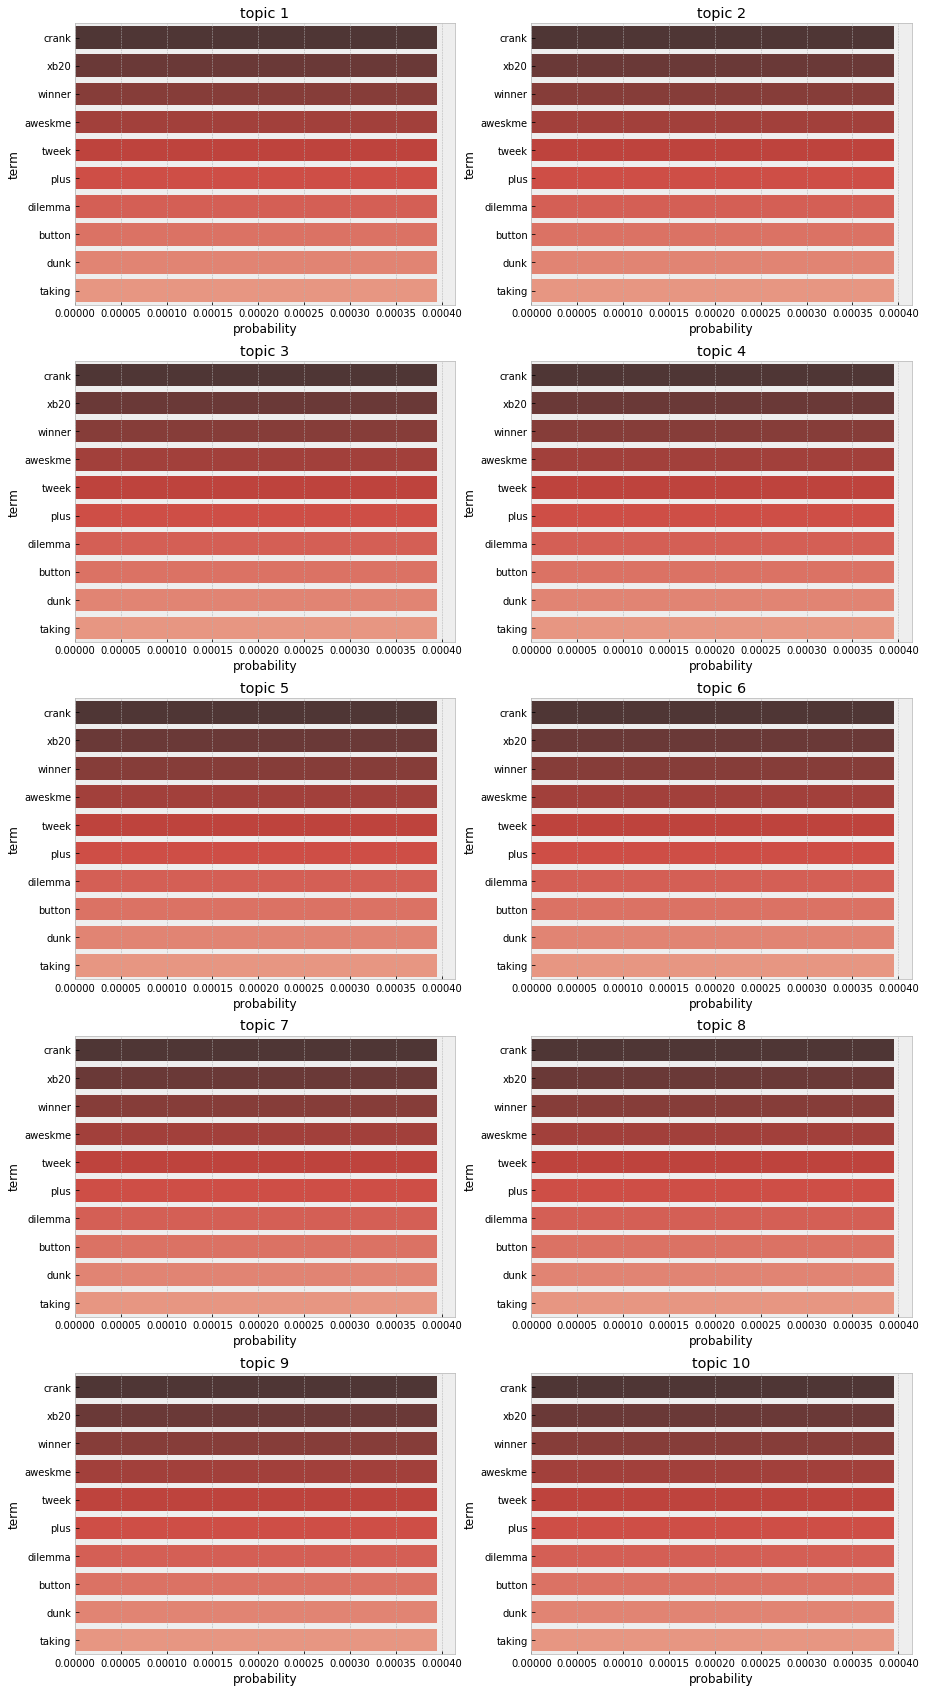

In [52]:
fiz = plt.figure(figsize=(15,30))
for i in range(10):
    df = pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    
plt.show()

## CLUSTERING : POSITIVE and NEGATIVE WORDS

In [53]:
from textblob import TextBlob
from nltk.corpus import stopwords
import string
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn import cluster

In [54]:
# Let's create our feature vector as Kmeans works with numerical values only
# thus we need to convert our text data into numeric features in some way which should 
# prove usful to our learning algorithm and it can easily find pattern in it.
# So, i will be using polarity score of the extracted adjectives as our feature

def create_polarity_vector(all_adjectives):
    # NLTK Vader sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    #Taking compound score as one feature, (compund score = -ve indicates negative sentiments)
    #(compund score = +ve indicates positive sentiments, ie compound value is normalization b/w +ve and -ve)
    feature_vector=[1 if sid.polarity_scores(i)['compound']>=0 else -1 for i in all_adjectives]
    
    return feature_vector

In [55]:
# utility function to extract all adjectives from text document
def extract_adjectives(text):
    tokenized_text= nltk.word_tokenize(text)
    tagged_text = nltk.pos_tag(tokenized_text)
    all_adjectives = list({i[0] for i in tagged_text if i[1] == 'JJ'})
    return all_adjectives

In [56]:
# Cleaning up text 
def clean_text(text):    
    
    #stopword removal
    stop_word=list(stopwords.words('english'))
    toke=list(text.split(' '))
    text = ' '.join([i for i in toke if i not in stop_word])
    
    #punctutaion removal
    t_lator=str.maketrans('','',string.punctuation)
    text=text.translate(t_lator)
    remove_digits = str.maketrans('', '', string.digits)
    text = text.translate(remove_digits)    
    
    #removing special symbol
    for i in '“”—':
        text = text.replace(i, ' ')
        
    return text

In [61]:
# cleaning our text data
review = ", ".join(review for review in data['reviews.text'])
text = clean_text(review)

In [62]:
# Getting adjectieves from our document
adjectives = extract_adjectives(text)

In [63]:
# Preparing our feature vector
features = create_polarity_vector(adjectives)

In [64]:
# Making clusters using KMeans
feature_ = np.array(features).reshape(-1,1)
kmeans = cluster.KMeans(n_clusters=2, n_init=200)
kmeans.fit(feature_)
labels = kmeans.predict(feature_)

In [65]:
# Identifying positive and negative terms

type1_terms,type2_terms = [], []

for i,j in zip(adjectives,labels):
    if j == 0 :
        type1_terms.append(i)
    else:
        type2_terms.append(i)
        

In [67]:
print("====Clustering Positive Terms=====\n")
print(type1_terms)

====Clustering Positive Terms=====

['problemsEasy', 'vital', 'bazooka', 'moreWhile', 'themgood', 'itll', 'works', 'wack', 'unusedbut', 'strobes', 'guided', 'librarywith', 'hopper', 'blu', 'avid', 'function', 'anyoneIm', 'awhile', 'inexcusable', 'oldish', 'connectivity', 'onyx', 'pivot', 'proper', 'loop', 'worseSo', 'snaps', 'carryon', 'blowing', 'conected', 'infinite', 'bed', 'momentary', 'Creative', 'withaudible', 'personOf', 'constant', 'dabble', 'wait', 'earned', 'Bose', 'actual', 'patient', 'adapter', 'teenager', 'defunct', 'st', 'realize', 'secure', 'flexiable', 'epileptic', 'insistent', 'f', 'extended', 'get', 'worksIm', 'dog', 'nonexistent', 'anaemic', 'face', 'mixed', 'hometown', 'iPod', 'audioThese', 'fuzzy', 'feedback', 'paired', 'proficient', 'con', 'x', 'bonusThe', 'feedbackThe', 'itvup', 'rear', 'integrated', 'indooroutdoor', 'disposable', 'realistic', 'sheep', 'electrical', 'Weekends', 'pry', 'consistent', 'along', 'userand', 'thank', 'PC', 'futuristic', 'strap', 'deck',

In [68]:
print("====Clustering Negative Terms=====\n")
print(type2_terms)

====Clustering Negative Terms=====

['sorry', 'disruptive', 'disappointed', 'unwanted', 'frustrating', 'furious', 'abused', 'pitiful', 'odd', 'disastrous', 'aggressive', 'demand', 'obsessive', 'serious', 'damn', 'sick', 'irritated', 'horrific', 'doubtful', 'scary', 'weird', 'irrational', 'ruin', 'illegal', 'broken', 'regret', 'unsuccessful', 'shake', 'failed', 'annoyed', 'problematic', 'inadequate', 'weak', 'drop', 'unbiased', 'destroyed', 'reluctant', 'burden', 'degradation', 'screw', 'fear', 'pay', 'frustrated', 'bummer', 'lag', 'hide', 'unacceptable', 'crappy', 'desperate', 'freezes', 'lazy', 'leak', 'cautious', 'cancel', 'dubious', 'useless', 'dead', 'hell', 'regrettable', 'shocked', 'torn', 'underestimated', 'skeptical', 'Terrible', 'Hard', 'broke', 'nonsense', 'drowned', 'giddy', 'noisy', 'painful', 'dirty', 'lagging', 'died', 'avoid', 'nuts', 'unstable', 'deceive', 'destroy', 'crash', 'upset', 'tricky', 'jumpy', 'bias', 'sad', 'fail', 'struggle', 'terrible', 'naive', 'messy', 'o